In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [44]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [45]:
merged = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/MERGE_on_sample.csv'), index_col=0)

In [46]:
MBN = merged[['NDE_cyle', 'failure_cycle', 'unfailed_cycle', 'f', 'peak_ratio',
       'fwhm_ratio', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio', ]]
MBN.columns

Index(['NDE_cyle', 'failure_cycle', 'unfailed_cycle', 'f', 'peak_ratio',
       'fwhm_ratio', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio'],
      dtype='object')

In [48]:
MBN.head()

,NDE_cyle,failure_cycle,unfailed_cycle,f,peak_ratio,fwhm_ratio,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio
ID,,,,,,,,,,
41C,0,2154137.0,NaN,0.0,1.689462,1.684771,2.104871,1.185236,1.002988,1.559453
43C,0,NaN,NaN,NaN,1.604726,1.399378,1.396620,0.996217,1.005710,1.393382
44C,0,1318034.0,NaN,0.0,1.624146,2.049678,2.280959,1.365329,0.998446,1.504218
45C,0,NaN,3245267.0,NaN,1.761623,1.592248,1.245687,0.809970,0.989351,1.282046
7C,150000,NaN,NaN,NaN,1.000095,1.016316,0.385614,1.305600,1.002897,1.109924


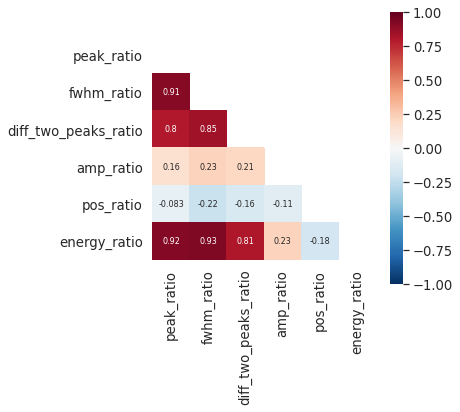

In [47]:
plot_corr(MBN[['peak_ratio', 'fwhm_ratio', 'diff_two_peaks_ratio', 
     'amp_ratio','pos_ratio', 'energy_ratio']], figsize=(5,5))

<AxesSubplot:>

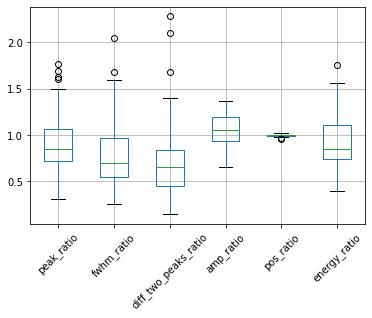

In [27]:
MBN[['peak_ratio', 'fwhm_ratio', 'diff_two_peaks_ratio', 
     'amp_ratio','pos_ratio', 'energy_ratio']].boxplot(rot=45)

In [49]:
MBN_2 = MBN.copy()
MBN_2.reset_index(inplace=True)
MBN_2.columns

Index(['ID', 'NDE_cyle', 'failure_cycle', 'unfailed_cycle', 'f', 'peak_ratio',
       'fwhm_ratio', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio'],
      dtype='object')

In [50]:
MBN_plot_2 = MBN_2[['ID','f', 'NDE_cyle', 'peak_ratio', 'fwhm_ratio', 'diff_two_peaks_ratio', 
     'amp_ratio','pos_ratio', 'energy_ratio']]\
.melt(id_vars=['ID', 'f', 'NDE_cyle'], value_name='MBN')

In [52]:
MBN_plot_2.dropna(how='any', inplace=True)

In [53]:
MBN_plot_2

,ID,f,NDE_cyle,variable,MBN
0,41C,0.000000,0,peak_ratio,1.689462
2,44C,0.000000,0,peak_ratio,1.624146
12,19C,0.492130,450000,peak_ratio,1.090518
14,32C,0.595126,450000,peak_ratio,0.988852
18,21C,0.749993,600000,peak_ratio,0.839725
...,...,...,...,...,...
206,42C,0.598514,900000,energy_ratio,0.817819
209,36C,1.000000,348957,energy_ratio,1.051439
210,6C,1.000000,318528,energy_ratio,1.316117
211,31C,1.000000,1073548,energy_ratio,0.824731


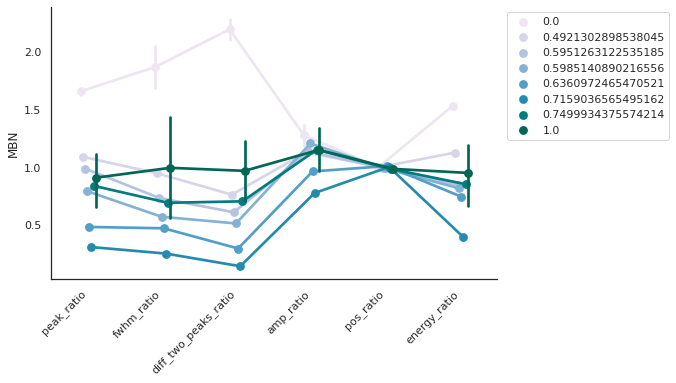

In [80]:
sns.set(rc={'figure.figsize':(8,5)}, style='white')

g = sns.pointplot(y='MBN', x='variable', kind='point', hue='f', 
            data=MBN_plot_2, palette=sns.color_palette('PuBuGn', n_colors=8), dodge=True, legend_out=False,
               )
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.01, 1))
sns.despine()

In [86]:
MBN_raw = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Extracted_data/MBN.csv'), index_col=0)

In [88]:
MBN_raw

,measure,peak,peak_ref,fwhm,fwhm_ref,diff_two_peaks,diff_two_peaks_ref,amp,amp_ref,pos,pos_ref,energy,energy_ref,Sample,peak_ratio,fwhm_ratio
location,,,,,,,,,,,,,,,,
1,1,0.267420,0.164482,0.033634,0.019858,0.035758,0.025778,0.015838,0.013743,7686.0,7624,408.764909,273.907729,41C,1.625834,1.693774
1,2,0.220200,0.164482,0.029495,0.019858,0.052288,0.025778,0.017809,0.013743,7642.0,7624,407.653684,273.907729,41C,1.338752,1.485317
1,3,0.222581,0.164482,0.028561,0.019858,0.048347,0.025778,0.014434,0.013743,7638.0,7624,395.134422,273.907729,41C,1.353230,1.438312
2,1,0.269990,0.164482,0.034059,0.019858,0.050624,0.025778,0.018987,0.013743,7677.0,7624,390.800935,273.907729,41C,1.641461,1.715168
2,2,0.246733,0.164482,0.033052,0.019858,0.060581,0.025778,0.020128,0.013743,7642.0,7624,415.882398,273.907729,41C,1.500066,1.664479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2,0.266634,0.177791,0.030577,0.016124,0.055583,0.025268,0.014134,0.010430,7588.0,7684,356.821249,249.070282,6C,1.499701,1.896428
5,3,0.219244,0.177791,0.022055,0.016124,0.037694,0.025268,0.012990,0.010430,7604.0,7684,326.323321,249.070282,6C,1.233153,1.367889
6,1,0.194222,0.177791,0.024528,0.016124,0.042488,0.025268,0.013571,0.010430,7574.0,7684,337.986332,249.070282,6C,1.092418,1.521262
